In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [7]:
df = pd.read_excel("/content/Online Retail.xlsx")

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [10]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [11]:
# Data Preprocessing
df.isnull().sum()

CustomerID        0
InvoiceNo         0
StockCode         0
Quantity          0
UnitPrice         0
Description    1454
InvoiceDate       0
Country           0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
# Data Preprocessing
df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
UnitPrice      0
Description    0
InvoiceDate    0
Country        0
dtype: int64

In [14]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [15]:
new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country','UnitPrice']]

new_df2 = df.copy()

In [16]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,UnitPrice
0,17850,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2.55
1,17850,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39
2,17850,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2.75
3,17850,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39
4,17850,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39


Exploratory Data Analysis(EDA)

In [17]:
# Grouping countries by TotalAmount of sales

country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4277438
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


<Axes: xlabel='Country'>

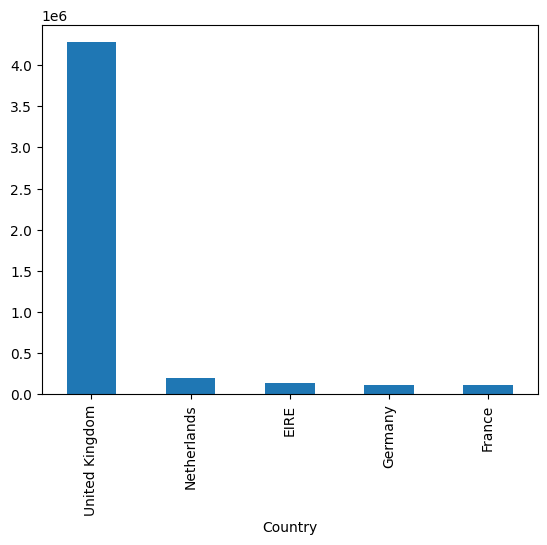

In [18]:
# Top 5 Companies with high number of purchase
country_price[:5].plot(kind = 'bar')

<Axes: xlabel='Country'>

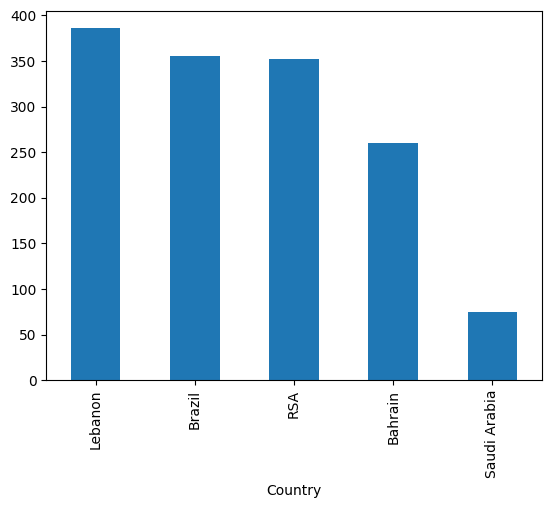

In [19]:
# 5 Compaies with least number of purchase
country_price[33:].plot(kind = 'bar')

In [20]:
# Adding year feature to the dataset

timest = new_df['InvoiceDate'].dt.year

new_df['Year'] = timest

new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,UnitPrice,Year
0,17850,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2.55,2010
1,17850,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39,2010
2,17850,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2.75,2010
3,17850,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39,2010
4,17850,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39,2010


<Axes: xlabel='Year'>

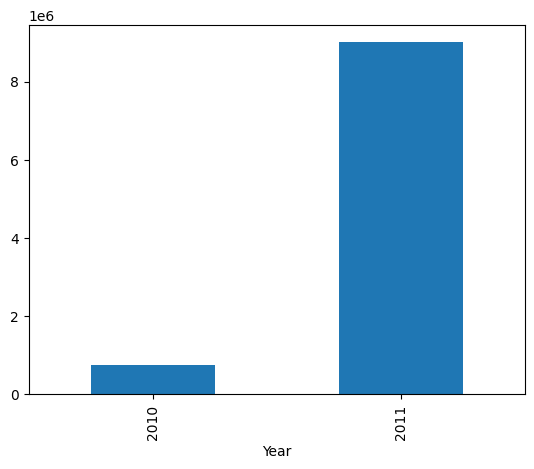

In [21]:
# Total sales for different years

new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

In [22]:
# finding the number of rows and columns
new_df.shape

(540455, 9)

In [80]:
# getting some informations about the dataset
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   540455 non-null  int64         
 1   InvoiceNo    540455 non-null  object        
 2   StockCode    540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   TotalAmount  540455 non-null  float64       
 5   InvoiceDate  540455 non-null  datetime64[ns]
 6   Country      540455 non-null  object        
 7   UnitPrice    540455 non-null  float64       
 8   Year         540455 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 41.2+ MB


In [82]:
X = new_df.iloc[:,[6,0]].values

In [83]:
print(X)

[['United Kingdom' 17850]
 ['United Kingdom' 17850]
 ['United Kingdom' 17850]
 ...
 ['France' 12680]
 ['France' 12680]
 ['France' 12680]]


In [42]:
# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [43]:
# Changing the datatype of Customer Id as per Business understanding
new_df['CustomerID'] = new_df['CustomerID'].astype(str)

In [44]:
# New Attribute : Monetary

new_df['Amount'] = new_df['Quantity']*new_df['UnitPrice']
rfm_m = new_df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346,0.00
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [45]:
# New Attribute : Frequency

rfm_f = new_df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346,2
1,12347,182
2,12348,31
3,12349,73
4,12350,17


In [46]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()


,CustomerID,Amount,Frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [47]:
# New Attribute : Recency

# Convert to datetime to proper datatype
new_df['InvoiceDate'] = pd.to_datetime(new_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [48]:
# Compute the maximum date to know the last transaction date

max_date = max(new_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [49]:
# Compute the difference between max date and transaction date
new_df['Diff'] = max_date - new_df['InvoiceDate']
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,UnitPrice,Year,Amount,Diff
0,17850,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2.55,2010,15.30,373 days 04:24:00
1,17850,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39,2010,20.34,373 days 04:24:00
2,17850,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2.75,2010,22.00,373 days 04:24:00
3,17850,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39,2010,20.34,373 days 04:24:00
4,17850,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,3.39,2010,20.34,373 days 04:24:00


In [50]:
# Compute last transaction date to get the recency of customers

rfm_p = new_df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [51]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [52]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


Text(0.5, 0, 'Attributes')

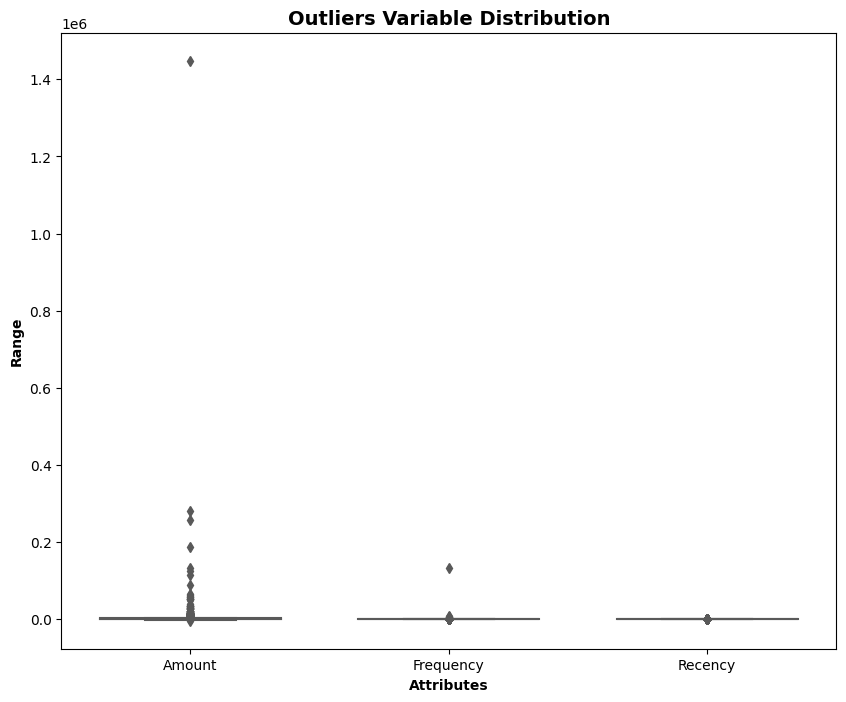

In [53]:
# Outlier Analysis of Amount and Frequency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [54]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]


# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]


In [55]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency','Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape


(4293, 3)

In [56]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.721176,-0.753154,2.301569
1,1.719462,1.041380,-0.906382
2,0.296553,-0.464035,-0.183602
3,0.274078,-0.045310,-0.738063
4,-0.531814,-0.603610,2.143152


In [57]:
# K Means Clustering
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

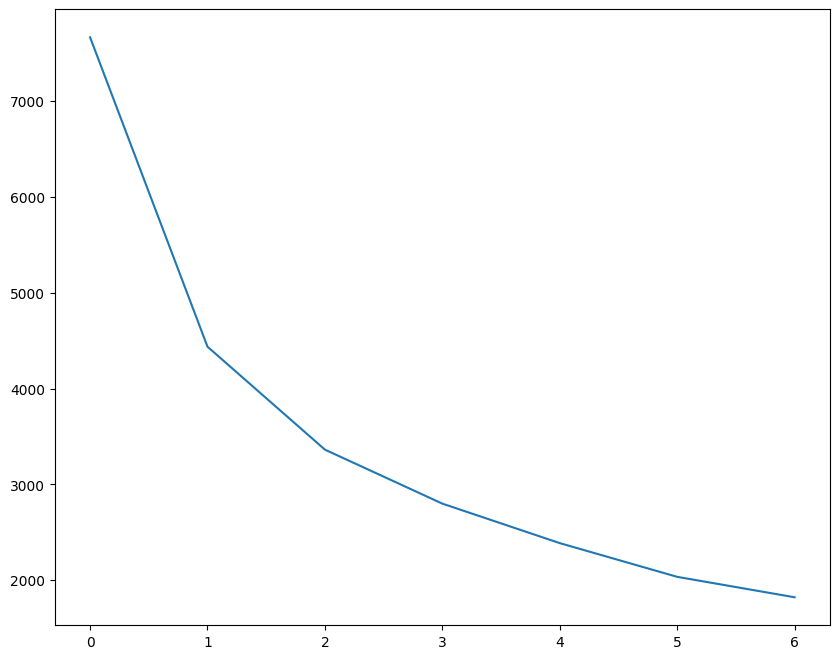

In [58]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(ssd)

In [59]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.5411873008403328


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, the silhouette score is 0.5087012698492827


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, the silhouette score is 0.485056414853252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.46592421420822083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.41789891720042477


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7, the silhouette score is 0.4157573483976019


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.40919935983053574


In [60]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [61]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346,0.00,2,325,2
1,12347,4310.00,182,1,1
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

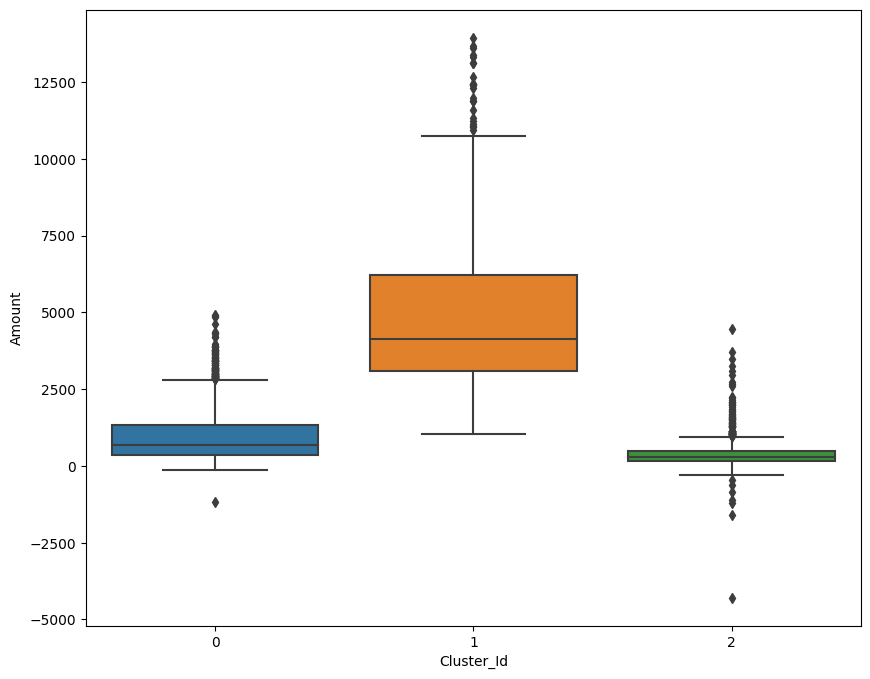

In [62]:
# Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

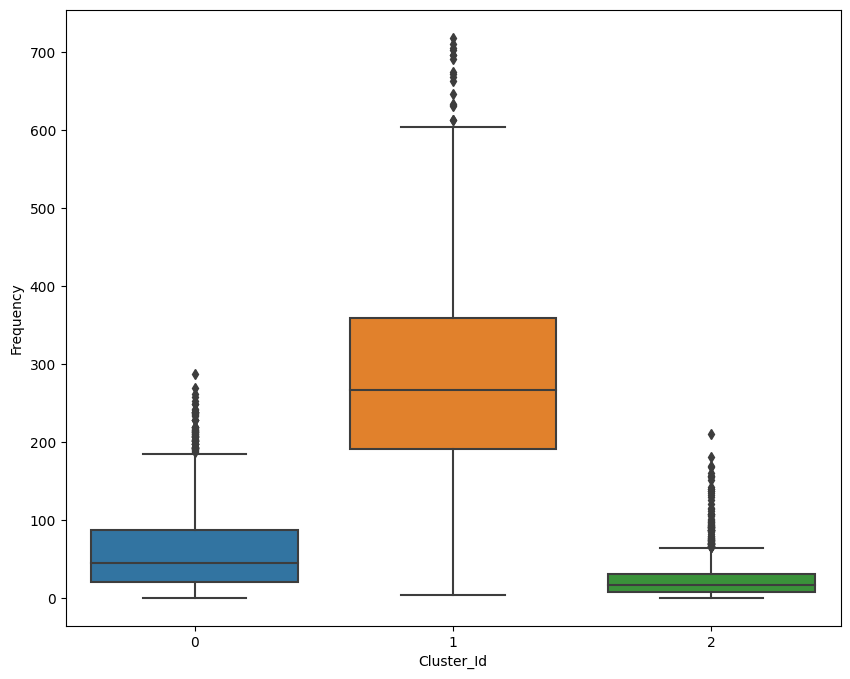

In [63]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

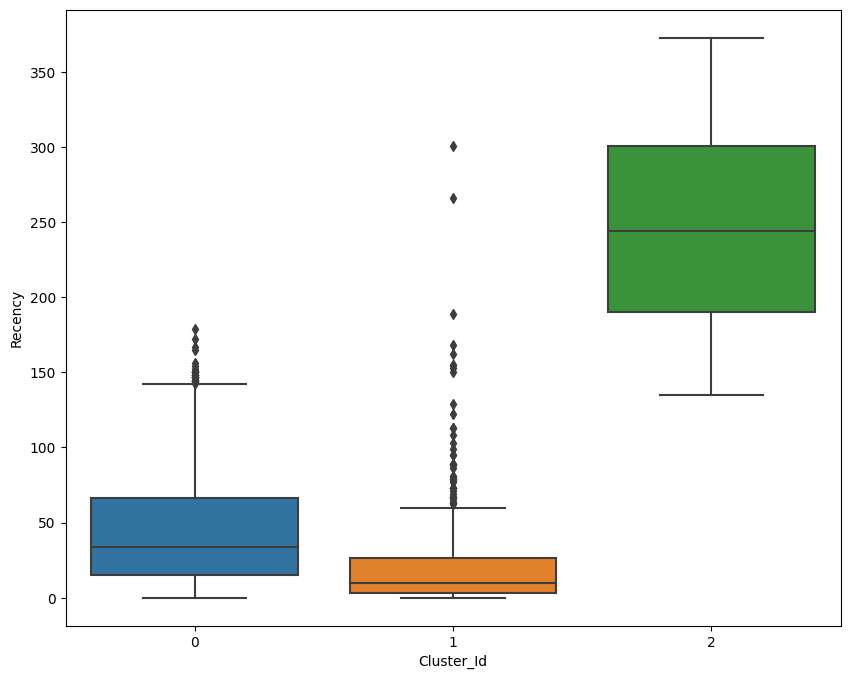

In [64]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [69]:
c = rfm.groupby('Cluster_Id')['CustomerID'].count()
c

Cluster_Id
0    2726
1     499
2    1068
Name: CustomerID, dtype: int64